# **Decision Tree**

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
df=pd.read_csv("/content/drive/MyDrive/datasets/ml/salaries.csv")
df

,company,job,degree,salary_more_than_100k
0,amazon,project manager,bachelors,1
1,amazon,project manager,masters,1
2,amazon,sales executive,bachelors,0
3,amazon,sales executive,masters,0
4,amazon,programmer,bachelors,0
5,amazon,programmer,masters,1
6,jp morgan,sales executive,masters,0
7,jp morgan,programmer,bachelors,0
8,jp morgan,project manager,bachelors,0
9,jp morgan,project manager,masters,1


In [60]:
df.columns

Index(['company', 'job', 'degree', 'salary_more_than_100k'], dtype='object')

In [61]:
cols=list(df.columns)
cols

['company', 'job', 'degree', 'salary_more_than_100k']

In [62]:
cols.remove(cols[-1])
cols

['company', 'job', 'degree']

In [63]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [64]:
for i in cols:
  df[f"{i}_en"]=le.fit_transform(df[i])
df

,company,job,degree,salary_more_than_100k,company_en,job_en,degree_en
0,amazon,project manager,bachelors,1,0,1,0
1,amazon,project manager,masters,1,0,1,1
2,amazon,sales executive,bachelors,0,0,2,0
3,amazon,sales executive,masters,0,0,2,1
4,amazon,programmer,bachelors,0,0,0,0
5,amazon,programmer,masters,1,0,0,1
6,jp morgan,sales executive,masters,0,1,2,1
7,jp morgan,programmer,bachelors,0,1,0,0
8,jp morgan,project manager,bachelors,0,1,1,0
9,jp morgan,project manager,masters,1,1,1,1


In [65]:
df.salary_more_than_100k.dtype

dtype('int64')

In [66]:
for i in df.columns:
  if df[i].dtype!=int:
    df.drop(i,axis=1,inplace=True)
df

,salary_more_than_100k,company_en,job_en,degree_en
0,1,0,1,0
1,1,0,1,1
2,0,0,2,0
3,0,0,2,1
4,0,0,0,0
5,1,0,0,1
6,0,1,2,1
7,0,1,0,0
8,0,1,1,0
9,1,1,1,1


In [67]:
x=df.drop("salary_more_than_100k",axis=1)
y=df.salary_more_than_100k

In [68]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=0)

In [69]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [70]:
dt.predict([[1,1,0]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [71]:
dt.predict([[2,0,0]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [72]:
dt.score(xtrain,ytrain)

1.0

In [73]:
dt.score(xtest,ytest)

0.75

[Text(0.7142857142857143, 0.9, 'company_en <= 1.5\ngini = 0.444\nsamples = 12\nvalue = [4, 8]\nclass = no'),
 Text(0.5714285714285714, 0.7, 'job_en <= 1.5\ngini = 0.444\nsamples = 6\nvalue = [4, 2]\nclass = yes'),
 Text(0.6428571428571428, 0.8, 'True  '),
 Text(0.42857142857142855, 0.5, 'degree_en <= 0.5\ngini = 0.5\nsamples = 4\nvalue = [2, 2]\nclass = yes'),
 Text(0.2857142857142857, 0.3, 'job_en <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [2, 1]\nclass = yes'),
 Text(0.14285714285714285, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = yes'),
 Text(0.42857142857142855, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = no'),
 Text(0.5714285714285714, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = no'),
 Text(0.7142857142857143, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = yes'),
 Text(0.8571428571428571, 0.7, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]\nclass = no'),
 Text(0.7857142857142857, 0.8, '  False')]

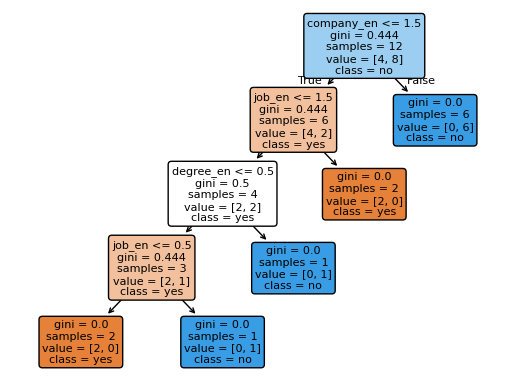

In [78]:
from sklearn.tree import plot_tree
plot_tree(dt,feature_names=x.columns,class_names=['yes','no'],filled=True,rounded=True,fontsize=8)

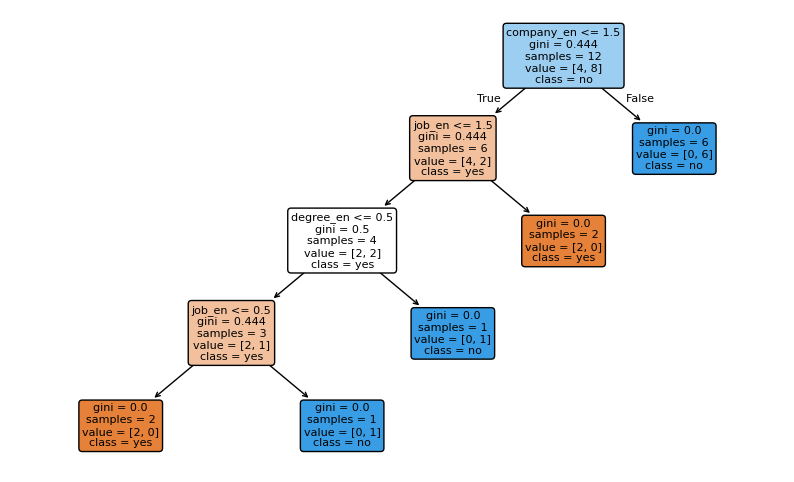

In [79]:
plt.figure(figsize=(10, 6))
plot_tree(dt,feature_names=x.columns,class_names=['yes','no'],filled=True,rounded=True,fontsize=8)
plt.show()